In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import gc

In [3]:
sales_train = pd.read_csv('sales_train.csv')
items = pd.read_csv('items.csv')
item_cat = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [7]:
item_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [8]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [10]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [24]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [26]:
sales_train['item_cnt_day'].max()

2169.0

In [27]:
sales_train[sales_train['item_cnt_day']==sales_train['item_cnt_day'].max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,2015-10-28,33,12,11373,0.908714,2169.0


In [29]:
items[items['item_id'] == 11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [30]:
sales_train[sales_train['item_price'] == sales_train['item_price'].max()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [31]:
items[items['item_id'] == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


## EDA

In [11]:
sales_train['date'] = pd.to_datetime(sales_train['date'],format="%d.%m.%Y")

group_by_shop_item_monthly = sales_train.groupby(by=['shop_id', 'item_id', 'date_block_num', 'item_price']).agg(
    {'item_cnt_day' : 'sum'}
).reset_index()

In [12]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
6,2013-01-02,0,25,2565,549.00,1.0
7,2013-01-04,0,25,2572,239.00,1.0
8,2013-01-11,0,25,2572,299.00,1.0
9,2013-01-03,0,25,2573,299.00,3.0


In [13]:
group_by_shop_item_monthly.head()

,shop_id,item_id,date_block_num,item_price,item_cnt_day
0,0,30,1,265.0,31.0
1,0,31,1,434.0,11.0
2,0,32,0,221.0,6.0
3,0,32,1,221.0,10.0
4,0,33,0,347.0,3.0


In [14]:
print('Numbers of item in data set is : ', group_by_shop_item_monthly['item_id'].nunique())
print('Numbers of shop in data set is : ',group_by_shop_item_monthly['shop_id'].nunique())

Numbers of item in data set is :  21807
Numbers of shop in data set is :  60


40

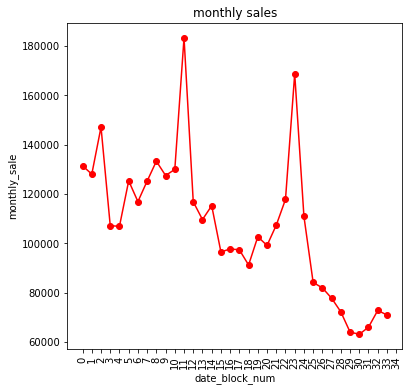

In [15]:
#sales every month
#sales of each item
#sales of each shop
#sales of each category
monthly_sale = group_by_shop_item_monthly.groupby(by='date_block_num')['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.plot(monthly_sale['date_block_num'], monthly_sale['item_cnt_day'], color='red', marker='o')
plt.xticks(np.arange(0, 35, 1), rotation=90)
plt.xlabel('date_block_num')
plt.ylabel('monthly_sale')
plt.title('monthly sales')
del monthly_sale
gc.collect()

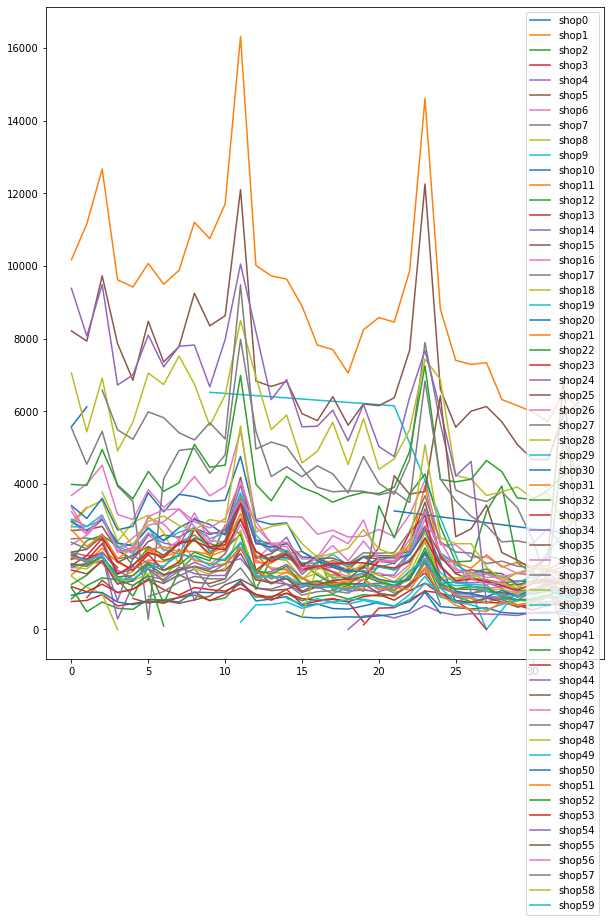

In [16]:
shop_sale = group_by_shop_item_monthly.groupby(by=['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(10, 12))
for shop_id in shop_sale['shop_id'].unique():
    subset = shop_sale[shop_sale['shop_id'] == shop_id]
    plt.plot(subset['date_block_num'], subset['item_cnt_day'], label = 'shop' + str(shop_id))
plt.legend()

plt.savefig("shop sales monthly.svg", format="svg")

In [17]:
# Sales in two month are extremely high, find out what happens in that two months
two_months = shop_sale[['item_cnt_day','date_block_num']].sort_values(by='item_cnt_day', ascending=False)[:2]['date_block_num'].values
print(two_months)

[11 23]


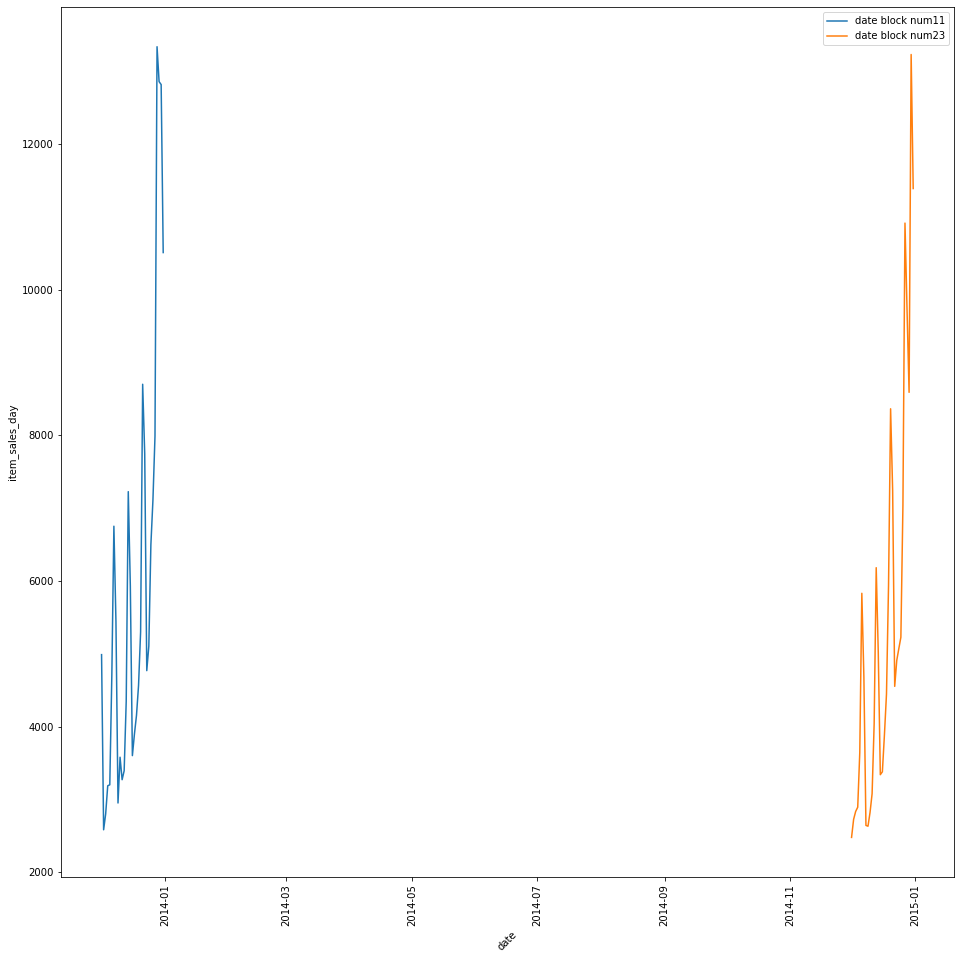

In [18]:
#group by date

daily_sales = sales_train.groupby(by=['date_block_num', 'date'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(16,16))
for date_block in two_months:
    df_sub = daily_sales[daily_sales['date_block_num'] == date_block]
    plt.plot(df_sub['date'], df_sub['item_cnt_day'], label = 'date block num' + str(date_block))
    plt.xticks(rotation=90)
    plt.xlabel("date", rotation=45)
    plt.ylabel("item_sales_day")
    
plt.legend()
plt.savefig(str(date_block) + "extreme_monthly_sale.svg", format='svg')

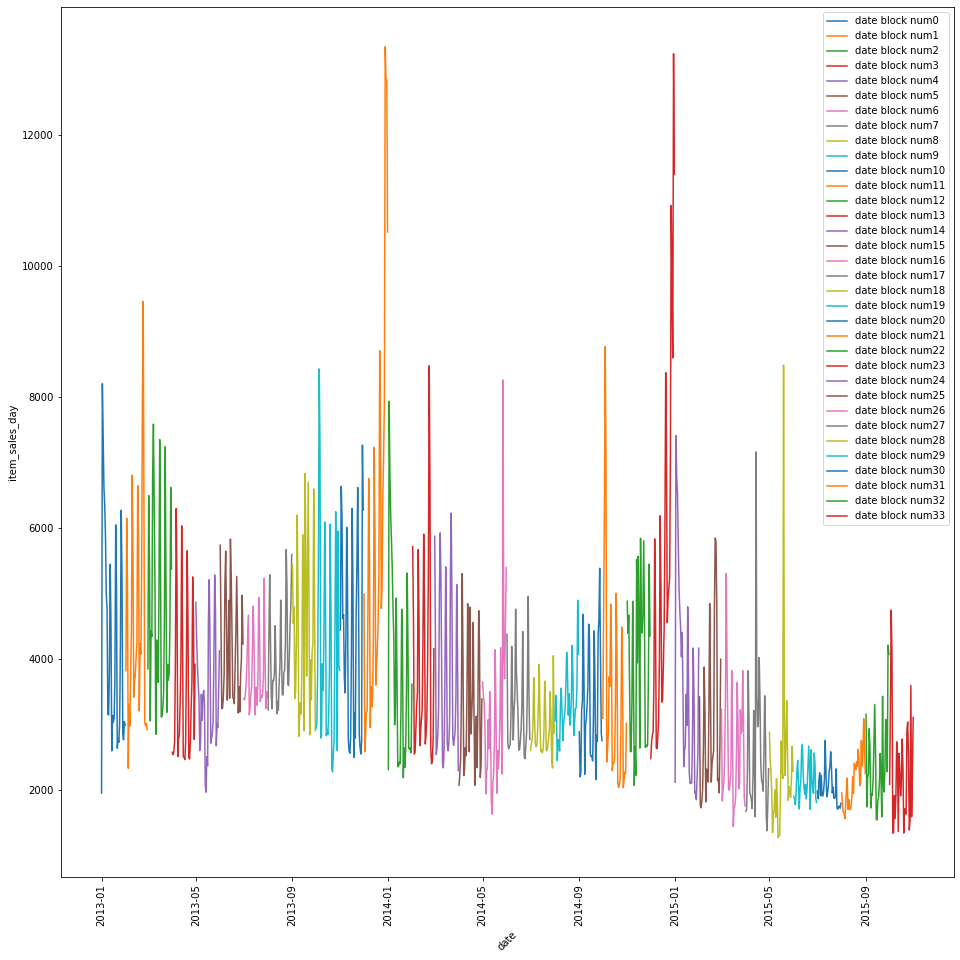

In [19]:
daily_sales = sales_train.groupby(by=['date_block_num', 'date'])['item_cnt_day'].sum().reset_index()

plt.figure(figsize=(16,16))
for date_block in sales_train['date_block_num'].unique():
    df_sub = daily_sales[daily_sales['date_block_num'] == date_block]
    plt.plot(df_sub['date'], df_sub['item_cnt_day'], label = 'date block num' + str(date_block))
    plt.xticks(rotation=90)
    plt.xlabel("date", rotation=45)
    plt.ylabel("item_sales_day")
    
plt.legend()
plt.savefig(str(date_block) + "monthly_sale.svg", format='svg')

In [20]:
#select 30 shops
from itertools import product

#combine = list(product(group_by_shop_item_monthly['item_id'], group_by_shop_item_monthly['shop_id']))

In [21]:
sales_train.item_id.nunique()

21807

In [22]:
import random

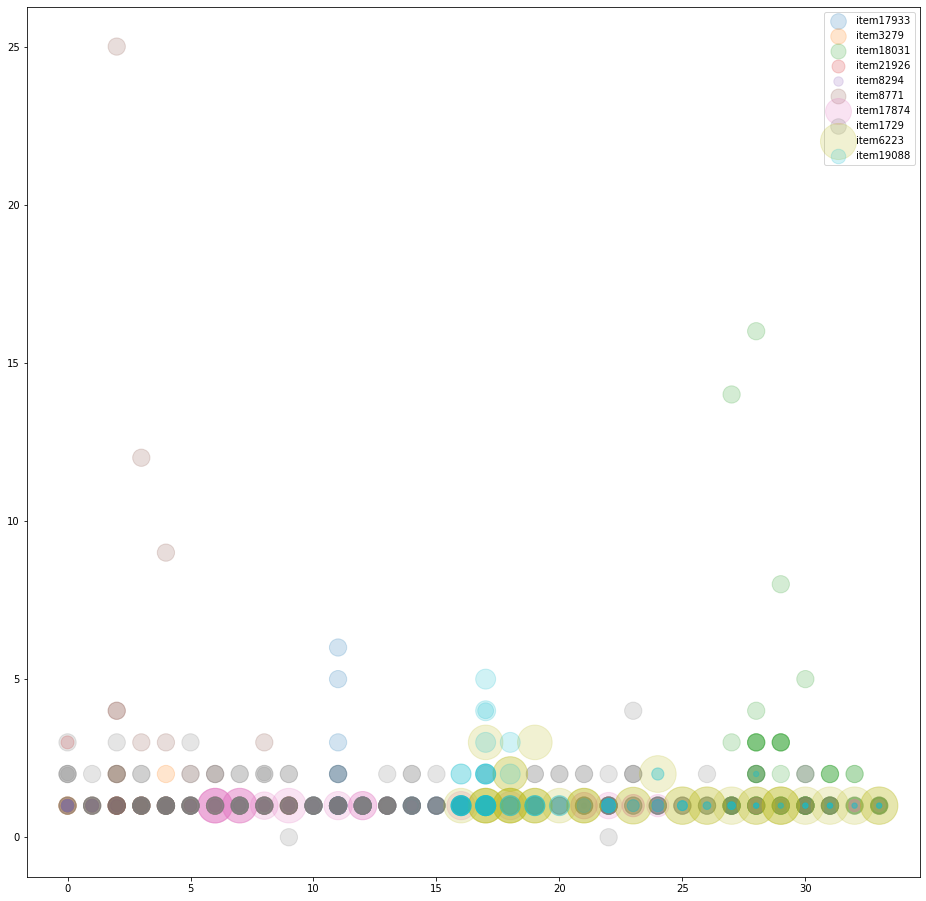

In [32]:
np.random.seed(12)
plt.figure(figsize=(16,16))
monthly_train = sales_train.groupby(by=['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum', 'item_price': 'mean'}).reset_index()
for item_id in sales_train['item_id'].unique()[np.random.choice(len(sales_train['item_id'].unique()), size=10)]:
    subset = monthly_train[monthly_train['item_id'] == item_id]
    plt.scatter(subset['date_block_num'], subset['item_cnt_day'],s=subset['item_price'] ,alpha=0.2 ,label = 'item' + str(item_id))

plt.legend()
plt.savefig("several_items.svg", format="svg")